# Chips Sales Analysis

 - **Created by: Rupsa Chaudhuri**
 - **LinkedIn:** https://www.linkedin.com/in/rupsa-chaudhuri/
 - **GitHub:** https://github.com/rupsa723?tab=repositories
     

###  Load the Data

We'll read the data from the provided files:

QVI_transaction_data.xlsx: This file likely contains transactional data.
QVI_purchase_behaviour.csv: This file likely contains information on purchase behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
# Load the data
transaction_data = pd.read_excel(r'C:\Users\rupsa\Downloads\Quantium Internship\QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv(r'C:\Users\rupsa\Downloads\Quantium Internship\QVI_purchase_behaviour.csv')

# Display the first few rows of each dataframe
print("Transaction Data:")
print(transaction_data.head())

print("\nPurchase Behaviour Data:")
print(purchase_behaviour.head())

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Purchase Behaviour Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG F

###  Summarize the Data

We'll generate basic summaries to get an initial understanding of the data.

In [3]:
# Summary statistics for transaction data
transaction_summary = transaction_data.describe(include='all')

# Summary statistics for purchase behaviour data
purchase_behaviour_summary = purchase_behaviour.describe(include='all')

transaction_summary, purchase_behaviour_summary


(                 DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
 count   264836.000000  264836.00000    2.648360e+05  2.648360e+05   
 unique            NaN           NaN             NaN           NaN   
 top               NaN           NaN             NaN           NaN   
 freq              NaN           NaN             NaN           NaN   
 mean     43464.036260     135.08011    1.355495e+05  1.351583e+05   
 std        105.389282      76.78418    8.057998e+04  7.813303e+04   
 min      43282.000000       1.00000    1.000000e+03  1.000000e+00   
 25%      43373.000000      70.00000    7.002100e+04  6.760150e+04   
 50%      43464.000000     130.00000    1.303575e+05  1.351375e+05   
 75%      43555.000000     203.00000    2.030942e+05  2.027012e+05   
 max      43646.000000     272.00000    2.373711e+06  2.415841e+06   
 
              PROD_NBR                               PROD_NAME       PROD_QTY  \
 count   264836.000000                                  264836  264836.000000

### Identify Missing Values

In [4]:
# Check for missing values in transaction data
missing_values_transaction = transaction_data.isnull().sum()

# Check for missing values in purchase behaviour data
missing_values_behaviour = purchase_behaviour.isnull().sum()

missing_values_transaction, missing_values_behaviour

(DATE              0
 STORE_NBR         0
 LYLTY_CARD_NBR    0
 TXN_ID            0
 PROD_NBR          0
 PROD_NAME         0
 PROD_QTY          0
 TOT_SALES         0
 dtype: int64,
 LYLTY_CARD_NBR      0
 LIFESTAGE           0
 PREMIUM_CUSTOMER    0
 dtype: int64)

###  Identifying and Handling Outliers

TOT_SALES: Mostly small transactions, with an average of 7.30 and a maximum of 650.00 dollars, indicating potential outliers.
We'll focus on TOT_SALES to identify potential outliers.

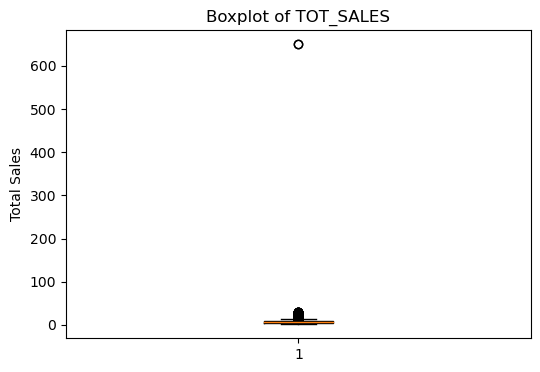

In [58]:
import matplotlib.pyplot as plt

# Plot TOT_SALES to identify outliers
plt.figure(figsize=(6,4))
plt.boxplot(transaction_data['TOT_SALES'])
plt.title('Boxplot of TOT_SALES')
plt.ylabel('Total Sales')
plt.show()


The boxplot of TOT_SALES indicates that there are indeed some outliers, with most transactions clustered below 10 and a few extending significantly higher, up to 650.00.

We will remove the outliers by filtering out top 1% of the data.

In [6]:
# Calculate the 99th percentile
threshold = transaction_data['TOT_SALES'].quantile(0.99)
# Filter the data to remove the top 1%
filtered_transaction_data = transaction_data[transaction_data['TOT_SALES'] <= threshold]

print("\nFiltered Data:")
print(filtered_transaction_data.describe())


Filtered Data:
                DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264051.000000  264051.000000    2.640510e+05  2.640510e+05   
mean    43464.046074     135.067714    1.355380e+05  1.351460e+05   
std       105.282999      76.786795    8.059354e+04  7.813593e+04   
min     43282.000000       1.000000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.000000    7.001800e+04  6.758450e+04   
50%     43464.000000     130.000000    1.303540e+05  1.351170e+05   
75%     43555.000000     203.000000    2.030930e+05  2.026935e+05   
max     43646.000000     272.000000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264051.000000  264051.000000  264051.000000  
mean       56.593170       1.898796       7.267126  
std        32.824607       0.316009       2.450433  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.

### Check and Correct Data Formats

In [7]:
# Convert DATE to datetime format
filtered_transaction_data['DATE'] = pd.to_datetime(filtered_transaction_data['DATE'], origin='1899-12-30', unit='D')

# Verify the date format
print(filtered_transaction_data['DATE'].head())


0   2018-10-17
1   2019-05-14
2   2019-05-20
5   2019-05-19
6   2019-05-16
Name: DATE, dtype: datetime64[ns]


C:\Users\rupsa\AppData\Local\Temp\ipykernel_19920\1941825135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction_data['DATE'] = pd.to_datetime(filtered_transaction_data['DATE'], origin='1899-12-30', unit='D')


###  Derive Additional Features

Extract pack size and brand name:

In [8]:
# Extract pack size from PROD_NAME
filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PROD_NAME'].str.extract(r'(\d+)g')
filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PACK_SIZE'].fillna(0).astype(int)

# Extract brand name
filtered_transaction_data['BRAND_NAME'] = filtered_transaction_data['PROD_NAME'].str.split().str[0]


C:\Users\rupsa\AppData\Local\Temp\ipykernel_19920\1811567043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PROD_NAME'].str.extract(r'(\d+)g')
C:\Users\rupsa\AppData\Local\Temp\ipykernel_19920\1811567043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transaction_data['PACK_SIZE'] = filtered_transaction_data['PACK_SIZE'].fillna(0).astype(int)
C:\Users\rupsa\AppData\Local\Temp\ipykernel_19920\1811567043.py:6: SettingWithCop

In [9]:
# Check the results 
brand_summary = filtered_transaction_data['BRAND_NAME'].value_counts()
brand_summary

BRAND_NAME
Kettle        41108
Smiths        28791
Pringles      25012
Doritos       24875
Thins         14029
RRD           11874
Infuzions     11035
WW            10320
Cobs           9669
Tostitos       9417
Twisties       9411
Old            9284
Tyrrells       6428
Grain          6258
Natural        6037
Red            5870
Cheezels       4583
CCs            4551
Woolworths     4437
Dorito         3175
Infzns         3138
Smith          2963
Cheetos        2915
Snbts          1576
Burger         1564
GrnWves        1465
Sunbites       1432
French         1418
NCC            1416
Name: count, dtype: int64

Clean brand names

In [33]:
# Convert brand names to a consistent case (e.g., uppercase)
filtered_transaction_data['BRAND_NAME'] = filtered_transaction_data['BRAND_NAME'].str.upper()

# Comprehensive replacement dictionary
brand_replacements = {
    'RED': 'RRD',
    'SNBTS': 'SUNBITES',
    'INFZNS': 'INFUZIONS',
    'WW': 'WOOLWORTHS',
    'SMITH': 'SMITHS',
    'NCC': 'NATURAL',
    'DORITO': 'DORITOS',
    'GRAIN': 'GRNWVES',
    'WOOLWORTHS': 'WOOLWORTHS'  # Ensure consistency
}

# Replace brand names using the dictionary
filtered_transaction_data['BRAND_NAME'] = filtered_transaction_data['BRAND_NAME'].replace(brand_replacements)

# Display value counts of the cleaned brand names
print(filtered_transaction_data['BRAND_NAME'].value_counts())

BRAND_NAME
KETTLE        41108
SMITHS        31754
DORITOS       28050
PRINGLES      25012
RRD           17744
WOOLWORTHS    14757
INFUZIONS     14173
THINS         14029
COBS           9669
TOSTITOS       9417
TWISTIES       9411
OLD            9284
GRNWVES        7723
NATURAL        7453
TYRRELLS       6428
CHEEZELS       4583
CCS            4551
SUNBITES       3008
CHEETOS        2915
BURGER         1564
FRENCH         1418
Name: count, dtype: int64


In [34]:
# Verify new features
print(filtered_transaction_data[['PROD_NAME', 'PACK_SIZE', 'BRAND_NAME']].head())

                                  PROD_NAME  PACK_SIZE BRAND_NAME
0    Natural Chip        Compny SeaSalt175g        175    NATURAL
1                  CCs Nacho Cheese    175g        175        CCS
2    Smiths Crinkle Cut  Chips Chicken 170g        170     SMITHS
5  Old El Paso Salsa   Dip Tomato Mild 300g        300        OLD
6  Smiths Crinkle Chips Salt & Vinegar 330g        330     SMITHS


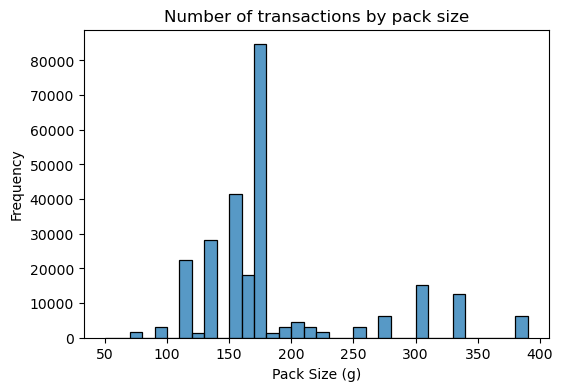

In [59]:
# Plot a histogram of PACK_SIZE
plt.figure(figsize=(6,4))
sns.histplot(filtered_transaction_data['PACK_SIZE'], bins=range(50, 400, 10))
plt.title('Number of transactions by pack size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.show()

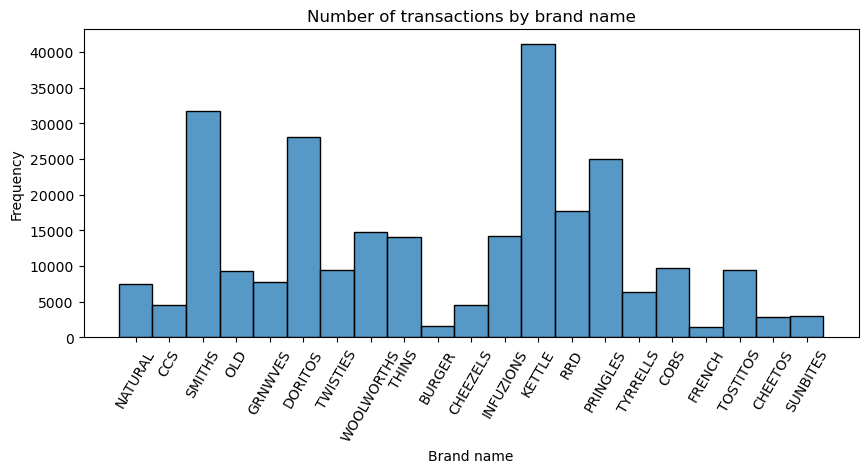

In [66]:
# Plot a histogram of BRAND_NAME
plt.figure(figsize=(10,4))
sns.histplot(filtered_transaction_data['BRAND_NAME'], bins=range(50, 400, 10))
plt.title('Number of transactions by brand name')
plt.xlabel('Brand name')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.show()

Count the frequency of each word occuring in product name:

In [55]:
# Further examine PROD_NAME
product_words = pd.DataFrame(filtered_transaction_data['PROD_NAME'].str.split(expand=True).stack().value_counts()).reset_index()
product_words.columns = ['words', 'frequency']

# Remove digits and special characters
product_words = product_words[~product_words['words'].str.contains(r'\d|&|\$|%', regex=True)]
print(product_words)

      words  frequency
1     Chips      49634
3    Kettle      41108
5    Smiths      28791
6      Salt      27912
7    Cheese      27794
..      ...        ...
214      Pc       1429
216   Aioli       1427
217   Fries       1418
218  Garden       1416
219     NCC       1416

[171 rows x 2 columns]


### Count the number of transactions by date

In [37]:
transactions_by_day = filtered_transaction_data.groupby('DATE').size().reset_index(name='N')
print(transactions_by_day)

          DATE    N
0   2018-07-01  724
1   2018-07-02  711
2   2018-07-03  722
3   2018-07-04  714
4   2018-07-05  712
..         ...  ...
359 2019-06-26  723
360 2019-06-27  709
361 2019-06-28  730
362 2019-06-29  745
363 2019-06-30  744

[364 rows x 2 columns]


In [38]:
# Create a sequence of dates and join this with the count of transactions by date
full_date_range = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})
transactions_by_day = pd.merge(full_date_range, transactions_by_day, on='DATE', how='left').fillna(0)
print(transactions_by_day)

          DATE      N
0   2018-07-01  724.0
1   2018-07-02  711.0
2   2018-07-03  722.0
3   2018-07-04  714.0
4   2018-07-05  712.0
..         ...    ...
360 2019-06-26  723.0
361 2019-06-27  709.0
362 2019-06-28  730.0
363 2019-06-29  745.0
364 2019-06-30  744.0

[365 rows x 2 columns]


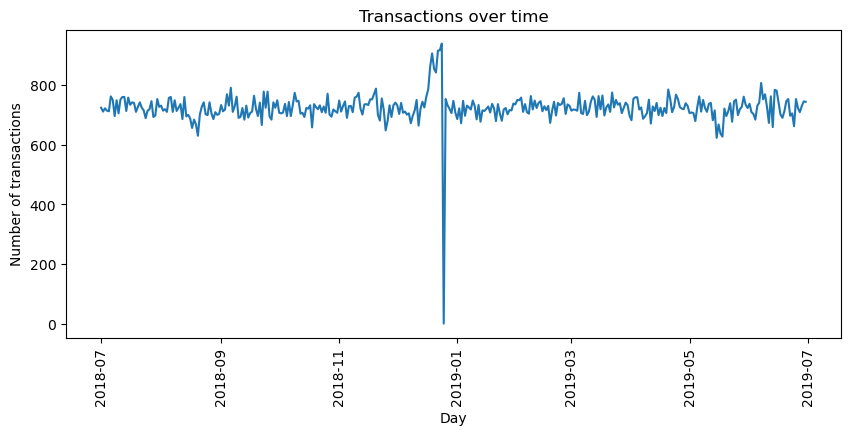

In [69]:
# Plot transactions over time
plt.figure(figsize=(10,4))
sns.lineplot(data=transactions_by_day, x='DATE', y='N')
plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()

We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.

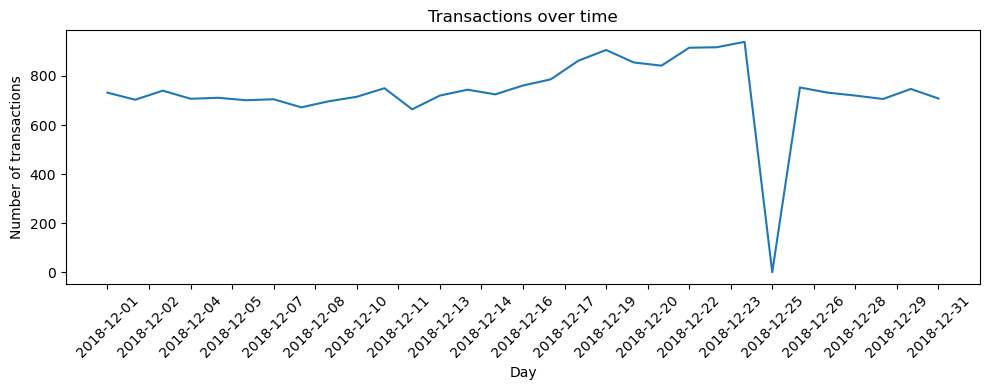

In [71]:
# Filter to December
transactions_by_day['DATE'] = pd.to_datetime(transactions_by_day['DATE'])
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plotting
plt.figure(figsize=(10, 4))
sns.lineplot(data=december_data, x='DATE', y='N')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(december_data), prune='both'))

# Show plot
plt.tight_layout()
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.


In [127]:
filtered_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,OLD
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,SMITHS


### Correlation Analysis

In [124]:
# Compute the correlation matrix
corr_matrix = filtered_transaction_data[['TOT_SALES', 'PROD_QTY', 'PACK_SIZE']].corr()

corr_matrix


,TOT_SALES,PROD_QTY,PACK_SIZE
TOT_SALES,1.000000,0.488852,0.375013
PROD_QTY,0.488852,1.000000,0.000074
PACK_SIZE,0.375013,0.000074,1.000000


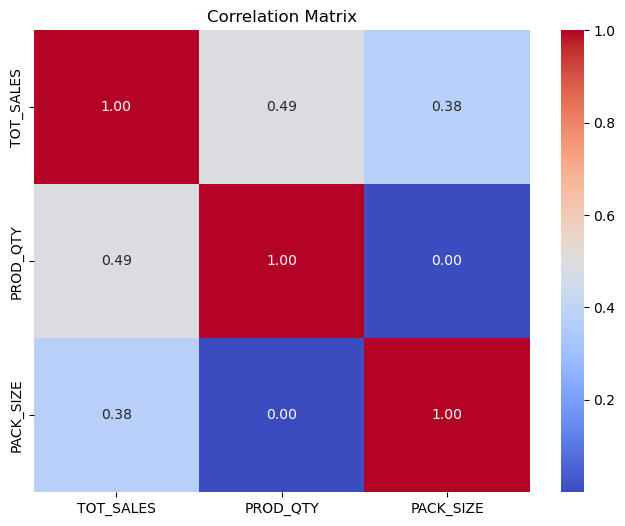

In [125]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Moderate Positive Correlation: Total sales and product quantity have a moderate positive correlation (0.488).
- Weak Positive Correlation: Total sales and pack size show a weak positive correlation (0.375).
- No Correlation: Product quantity and pack size have no significant correlation (0.000074).

### Customer segmentation

Let's uncover:

Chip spending by customer group (lifestages & budget habits)
Number of customers in each lifestage group
Average chip purchases per customer group
Average chip price per customer group

In [41]:
# Merge transaction and purchase behaviour data
merged_data = filtered_transaction_data.merge(purchase_behaviour, on='LYLTY_CARD_NBR',how='left')

# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Verify the results
print(total_sales_by_segment)



                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35239.70
1   MIDAGE SINGLES/COUPLES       Mainstream   90082.00
2   MIDAGE SINGLES/COUPLES          Premium   58041.45
3             NEW FAMILIES           Budget   21847.85
4             NEW FAMILIES       Mainstream   16927.15
5             NEW FAMILIES          Premium   11450.50
6           OLDER FAMILIES           Budget  166966.45
7           OLDER FAMILIES       Mainstream  102457.90
8           OLDER FAMILIES          Premium   79937.20
9    OLDER SINGLES/COUPLES           Budget  135676.80
10   OLDER SINGLES/COUPLES       Mainstream  132407.00
11   OLDER SINGLES/COUPLES          Premium  131260.25
12                RETIREES           Budget  112263.60
13                RETIREES       Mainstream  154774.35
14                RETIREES          Premium   96926.40
15          YOUNG FAMILIES           Budget  138196.20
16          YOUNG FAMILIES       Mainstream   92000.35
17        

In [42]:
# Check for missing customer details
missing_customers = merged_data[merged_data.isnull().any(axis=1)]
missing_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER


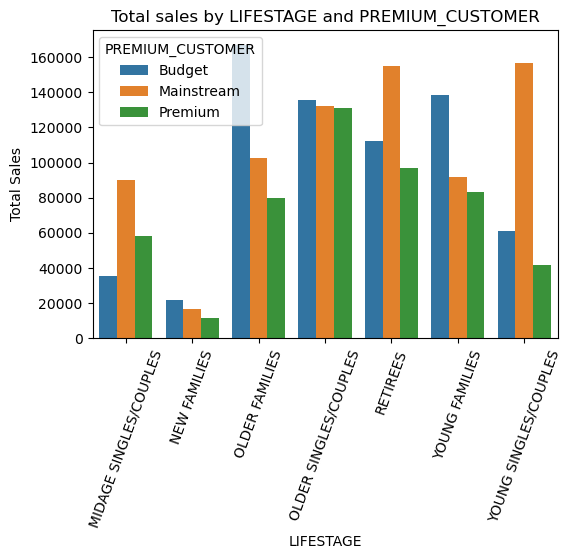

In [80]:
# Plot total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(6, 4))
sns.barplot(data=total_sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=70)
plt.ylabel('Total Sales')
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees

Let’s see if the higher sales are due to there being more customers who buy chips

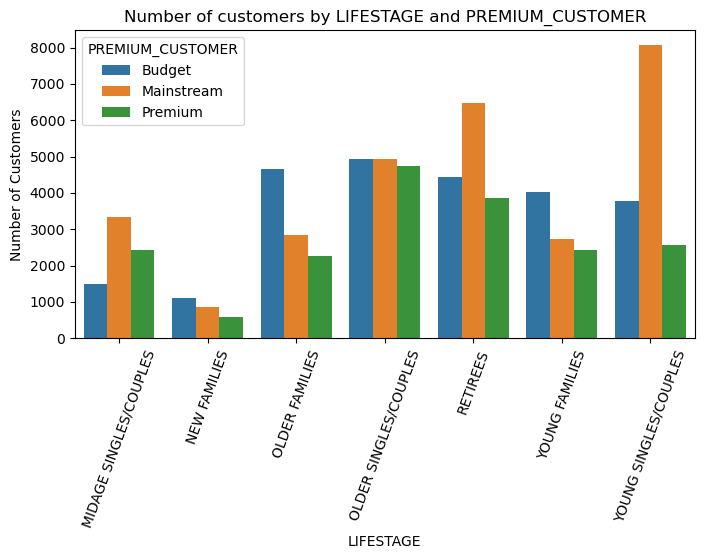

In [81]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Plot number of customers by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(8, 4))
sns.barplot(data=customers_by_segment, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER')
plt.title('Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=70)
plt.ylabel('Number of Customers')
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget-Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

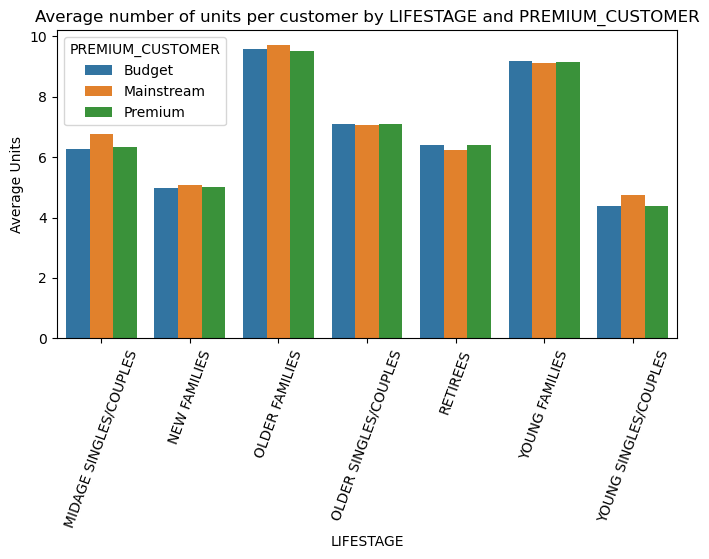

In [91]:
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer =merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: pd.Series({
        'AVG': x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()
    })).reset_index()

# Plot average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(8,4))
sns.barplot(data=avg_units_per_customer, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER')
plt.title('Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=70)
plt.ylabel('Average Units')
plt.show()

Older families and young families in general buy more chips per customer


Let’s also investigate the average price per unit chips bought for each customer segment as this is also a
driver of total sales.

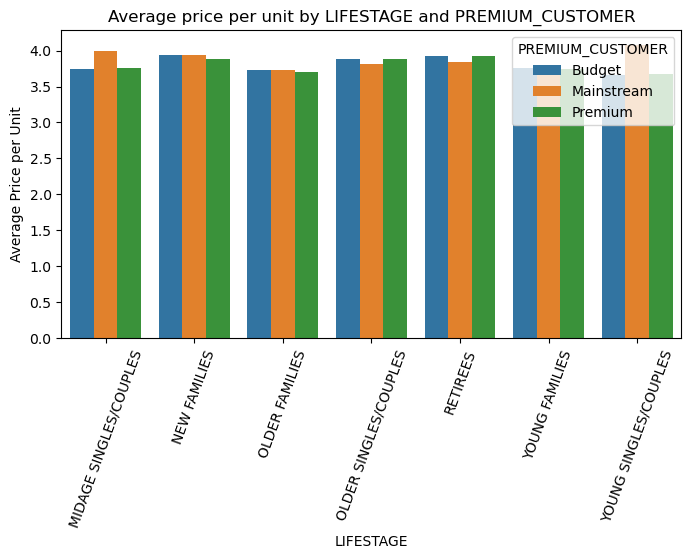

In [93]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: pd.Series({
        'AVG': x['TOT_SALES'].sum() / x['PROD_QTY'].sum()
    })
).reset_index()
# Plot average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(8,4))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER')
plt.title('Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=70)
plt.ylabel('Average Price per Unit')
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.


As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [94]:
from scipy.stats import ttest_ind

# Calculate the price per unit
merged_data['price'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

# Filter data for the two groups
group_mainstream = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]['price']

group_other = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (merged_data['PREMIUM_CUSTOMER'] != 'Mainstream')
]['price']

# Perform independent t-test
t_stat, p_value = ttest_ind(group_mainstream, group_other, alternative='greater')

# Display the result
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 40.758905548288816, P-value: 0.0


The t-test results in a p-value is 0.000, i.e. the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples.

In [97]:
# Filter data into segment1 and other
segment1 = merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = merged_data[~((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate total quantity for each segment
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Calculate the quantity per brand for each segment
quantity_segment1_by_brand = segment1.groupby('BRAND_NAME')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1
quantity_segment1_by_brand = quantity_segment1_by_brand[['BRAND_NAME', 'targetSegment']]

quantity_other_by_brand = other.groupby('BRAND_NAME')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other
quantity_other_by_brand = quantity_other_by_brand[['BRAND_NAME', 'other']]

# Merge the two dataframes
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND_NAME')

# Calculate brand affinity
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Sort by affinityToBrand in descending order
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Display the result
print(brand_proportions)

    BRAND_NAME  targetSegment     other  affinityToBrand
19    TYRRELLS       0.029745  0.023961         1.241357
18    TWISTIES       0.043303  0.035151         1.231928
17    TOSTITOS       0.042678  0.035189         1.212818
9       KETTLE       0.184610  0.153860         1.199852
11         OLD       0.041481  0.034667         1.196575
12    PRINGLES       0.111848  0.093554         1.195550
5      DORITOS       0.122934  0.105205         1.168519
4         COBS       0.041872  0.036399         1.150350
8    INFUZIONS       0.060843  0.053252         1.142547
16       THINS       0.056783  0.053001         1.071353
7      GRNWVES       0.030603  0.029100         1.051658
3     CHEEZELS       0.016941  0.017321         0.978048
14      SMITHS       0.093606  0.121918         0.767781
6       FRENCH       0.003721  0.005400         0.689121
2      CHEETOS       0.007573  0.011200         0.676151
13         RRD       0.045359  0.068534         0.661842
10     NATURAL       0.018477  

We can see that :
- Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
- Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population
Let’s also find out if our target segment tends to buy larger packs of chips

Let’s also find out if our target segment tends to buy larger packs of chips.

In [98]:
# Calculate the quantity per pack size for each segment
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / quantity_segment1
quantity_segment1_by_pack = quantity_segment1_by_pack[['PACK_SIZE', 'targetSegment']]

quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / quantity_other
quantity_other_by_pack = quantity_other_by_pack[['PACK_SIZE', 'other']]

# Merge the two dataframes
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')

# Calculate affinity to each pack size
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Sort by affinityToPack in descending order
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

# Display the result
print(pack_proportions)

    PACK_SIZE  targetSegment     other  affinityToPack
18        270       0.029875  0.023262        1.284299
21        380       0.030161  0.023756        1.269607
20        330       0.057538  0.046566        1.235605
15        210       0.014469  0.011779        1.228397
5         134       0.111848  0.093554        1.195550
3         110       0.099852  0.083721        1.192666
17        250       0.013428  0.011889        1.129460
6         135       0.013688  0.012222        1.120011
10        170       0.075728  0.075340        1.005144
11        175       0.236214  0.245645        0.961606
19        300       0.054909  0.057330        0.957778
7         150       0.150805  0.157764        0.955895
9         165       0.052333  0.058069        0.901226
0           0       0.019908  0.023154        0.859818
13        190       0.007052  0.011606        0.607648
12        180       0.003253  0.005668        0.573912
8         160       0.006037  0.011604        0.520297
2         

It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [99]:
# Filter data where PACK_SIZE is 270 and get unique product names
merged_data[merged_data['PACK_SIZE'] == 270]['PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

### Customer Lifetime Value (CLV)

In [100]:
# Calculate CLV for each customer
clv = merged_data.groupby('LYLTY_CARD_NBR').agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).reset_index()
clv.columns = ['LYLTY_CARD_NBR', 'Total_Sales', 'Total_Quantity']

# Merge CLV with customer data
clv = clv.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

# Group by customer segment to get average CLV
clv_segment = clv.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'Total_Sales': 'mean',
    'Total_Quantity': 'mean'
}).reset_index()

print(clv_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  Total_Sales  Total_Quantity
0   MIDAGE SINGLES/COUPLES           Budget    23.493133        6.284667
1   MIDAGE SINGLES/COUPLES       Mainstream    27.002998        6.754796
2   MIDAGE SINGLES/COUPLES          Premium    23.875545        6.349239
3             NEW FAMILIES           Budget    19.647347        4.994604
4             NEW FAMILIES       Mainstream    19.937750        5.062426
5             NEW FAMILIES          Premium    19.473639        5.013605
6           OLDER FAMILIES           Budget    35.768305        9.585476
7           OLDER FAMILIES       Mainstream    36.191416        9.718121
8           OLDER FAMILIES          Premium    35.183627        9.503081
9    OLDER SINGLES/COUPLES           Budget    27.554184        7.103168
10   OLDER SINGLES/COUPLES       Mainstream    26.890130        7.061738
11   OLDER SINGLES/COUPLES          Premium    27.633737        7.106737
12                RETIREES           Budget    25.2

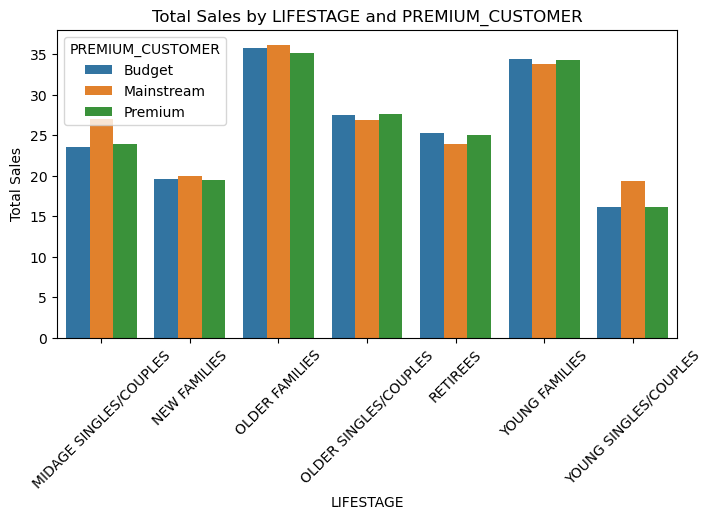

In [104]:
# Total Sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(8, 4))
sns.barplot(data=clv_segment, x='LIFESTAGE', y='Total_Sales', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

- Older Families and Young Families lead in total sales and quantities, suggesting they are the most valuable customer segments.
- Minimal differences in purchasing behavior across Budget, Mainstream, and Premium statuses within Older and Young Families.

### Churn Analysis

In [105]:
# Identify customers with last purchase date
last_purchase = merged_data.groupby('LYLTY_CARD_NBR')['DATE'].max().reset_index()
last_purchase.columns = ['LYLTY_CARD_NBR', 'Last_Purchase_Date']

# Define churned customers (e.g., no purchase in the last 3 months of data)
end_date = merged_data['DATE'].max()
churn_threshold = end_date - pd.DateOffset(months=3)
churned_customers = last_purchase[last_purchase['Last_Purchase_Date'] < churn_threshold]

# Merge with customer data to analyze churned customers
churned_customers = churned_customers.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')
churned_segment = churned_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Churn_Count')

print(churned_segment)


                 LIFESTAGE PREMIUM_CUSTOMER  Churn_Count
0   MIDAGE SINGLES/COUPLES           Budget          669
1   MIDAGE SINGLES/COUPLES       Mainstream         1422
2   MIDAGE SINGLES/COUPLES          Premium         1102
3             NEW FAMILIES           Budget          532
4             NEW FAMILIES       Mainstream          411
5             NEW FAMILIES          Premium          306
6           OLDER FAMILIES           Budget         1601
7           OLDER FAMILIES       Mainstream          999
8           OLDER FAMILIES          Premium          791
9    OLDER SINGLES/COUPLES           Budget         2016
10   OLDER SINGLES/COUPLES       Mainstream         2011
11   OLDER SINGLES/COUPLES          Premium         1938
12                RETIREES           Budget         1948
13                RETIREES       Mainstream         2889
14                RETIREES          Premium         1687
15          YOUNG FAMILIES           Budget         1456
16          YOUNG FAMILIES     

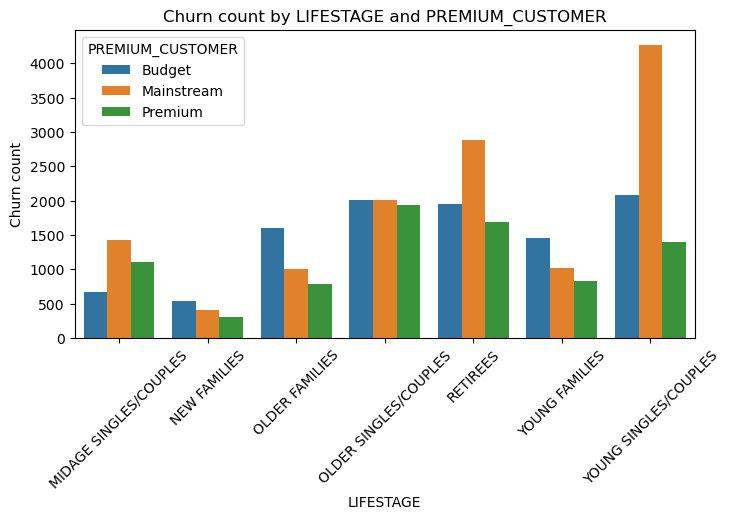

In [106]:
# Churn count by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(8, 4))
sns.barplot(data=churned_segment, x='LIFESTAGE', y='Churn_Count', hue='PREMIUM_CUSTOMER')
plt.title('Churn count by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.ylabel('Churn count')
plt.show()

- Young Singles/Couples have the highest churn rates, especially in the Mainstream category, indicating a need for targeted retention strategies.
- Retirees show substantial churn, with Mainstream customers leading, suggesting potential for improved engagement with senior customers.
- New and Young Families have comparatively lower churn rates, indicating better retention or satisfaction levels within these segments.

### Seasonality Analysis

In [115]:
# Ensure TOT_SALES is numeric
merged_data['TOT_SALES'] = pd.to_numeric(merged_data['TOT_SALES'], errors='coerce')

# Extract Month from transaction date
merged_data['Month'] = pd.to_datetime(merged_data['DATE']).dt.to_period('M')

# Group by Month and calculate total sales
monthly_sales = merged_data.groupby('Month').agg({'TOT_SALES': 'sum'}).reset_index()

# Convert Month back to a datetime object for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()
monthly_sales


,Month,TOT_SALES
0,2018-07-01,165258.20
1,2018-08-01,150688.30
2,2018-09-01,160522.00
3,2018-10-01,164415.70
4,2018-11-01,160233.70
5,2018-12-01,167913.40
6,2019-01-01,162642.30
7,2019-02-01,150645.50
8,2019-03-01,166265.20
9,2019-04-01,159845.10


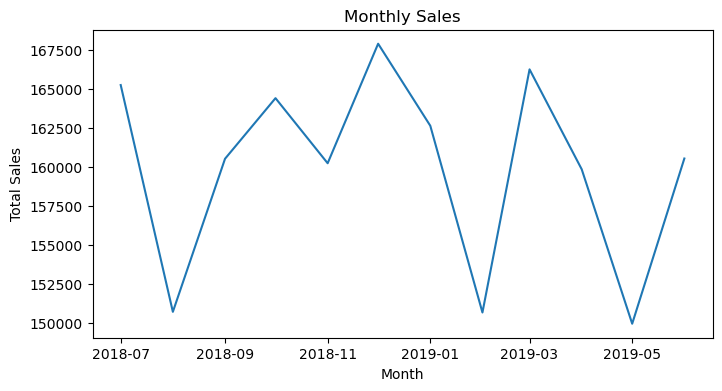

In [116]:
# Plot monthly sales
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_sales, x='Month', y='TOT_SALES')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Sales Fluctuation:** The sales figures fluctuate month-to-month, indicating variability in customer purchasing behavior across different times of the year.

**Peak Sales:** December 2018 shows the highest total sales (167,913.40), suggesting a potential seasonal peak during the holiday season.

**Low Sales Periods:** February 2019 and May 2019 have the lowest total sales (150,645.50 and 149,923.95 respectively), indicating potential post-holiday and pre-summer lulls.

**Moderate Variability:** While there are peaks and troughs, the overall variability in monthly sales is moderate, with values ranging from around 149,924 to 167,913.

**No Strong Seasonal Trend:** Aside from the holiday season peak, there is no strong, clear seasonal trend, indicating that other factors might also significantly influence monthly sales.

### Overall Summary:

The analysis conducted on the transaction data and purchase behavior data revealed several key insights and findings that can help drive business decisions and strategies. Here are the high-level findings and key callouts:

**Customer Segmentation:**
Older Families and Young Families are the most valuable customer segments in terms of total sales and quantities.
Mainstream young singles/couples are more likely to purchase Tyrrells chips, while they are less likely to purchase Burger Rings.
Mainstream midage and young singles/couples are willing to pay more per packet of chips compared to their budget and premium counterparts.

**Churn Analysis:**
Young Singles/Couples, especially in the Mainstream category, have the highest churn rates, indicating a need for targeted retention strategies.
Retirees show substantial churn, with Mainstream customers leading, suggesting potential for improved engagement with senior customers.
New and Young Families have comparatively lower churn rates, indicating better retention or satisfaction levels within these segments.

**Seasonality Analysis:**
Sales figures fluctuate month-to-month, indicating variability in customer purchasing behavior.
December 2018 shows the highest total sales, suggesting a potential seasonal peak during the holiday season.
February 2019 and May 2019 have the lowest total sales, indicating potential post-holiday and pre-summer lulls.

**Customer Lifetime Value (CLV):**
Older Families and Young Families lead in total sales and quantities, suggesting they are the most valuable customer segments.
Minimal differences in purchasing behavior across Budget, Mainstream, and Premium statuses within Older and Young Families.

Overall, the analysis provides valuable insights into customer behavior, preferences, and trends, which can be leveraged to optimize marketing strategies, improve customer retention, and drive business growth. It is recommended to focus on targeted marketing efforts for high-churn segments and capitalize on seasonal trends to maximize sales opportunities.